In [61]:
import pandas as pd
import numpy as np
import ast

# for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# for stop words
from nltk.corpus import stopwords

# for n-gram
from nltk.util import ngrams

In [62]:
df = pd.read_excel("Data/gerald_data_processed.xlsx")
df['lemmatized_requirements'] = df['lemmatized_requirements'].apply(ast.literal_eval)

print(df.shape)
df.head()

(17880, 27)


,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,function,fraudulent,tokenized_company_profile,tokenized_description,tokenized_requirements,tokenized_benefits,lemmatized_company_profile,lemmatized_description,lemmatized_requirements,lemmatized_benefits
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,we are food52 and we have created a groundbrea...,food52 a fast growing james beard award winnin...,experience with content management systems a m...,NaN,...,Marketing,0,"['food52', 'created', 'groundbreaking', 'award...","['food52', 'fast', 'growing', 'james', 'beard'...","['experience', 'content', 'management', 'syste...",[],"['food52', 'created', 'groundbreaking', 'award...","['food52', 'fast', 'growing', 'james', 'beard'...","[experience, content, management, system, majo...",[]
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,90 seconds the worlds cloud video production s...,organised focused vibrant awesome do you have ...,what we expect from you your key responsibilit...,what you will get from usthrough being part of...,...,Customer Service,0,"['90', 'seconds', 'worlds', 'cloud', 'video', ...","['organised', 'focused', 'vibrant', 'awesome',...","['expect', 'key', 'responsibility', 'communica...","['get', 'usthrough', 'part', '90', 'seconds', ...","['90', 'second', 'world', 'cloud', 'video', 'p...","['organised', 'focused', 'vibrant', 'awesome',...","[expect, key, responsibility, communicate, cli...","['get', 'usthrough', 'part', '90', 'second', '..."
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement pre commissioning and commissioning ...,NaN,...,NaN,0,"['valor', 'services', 'provides', 'workforce',...","['client', 'located', 'houston', 'actively', '...","['implement', 'pre', 'commissioning', 'commiss...",[],"['valor', 'service', 'provides', 'workforce', ...","['client', 'located', 'houston', 'actively', '...","[implement, pre, commissioning, commissioning,...",[]
3,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelor s or master s in gis busine...,our culture is anything but corporate we have ...,...,Sales,0,"['passion', 'improving', 'quality', 'life', 'g...","['company', 'esri', 'environmental', 'systems'...","['education', 'bachelor', 'master', 'gis', 'bu...","['culture', 'anything', 'corporate', 'collabor...","['passion', 'improving', 'quality', 'life', 'g...","['company', 'esri', 'environmental', 'system',...","[education, bachelor, master, gi, business, ad...","['culture', 'anything', 'corporate', 'collabor..."
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualifications right now license in the state ...,full benefits offered,...,Health Care Provider,0,"['spotsource', 'solutions', 'llc', 'global', '...","['job', 'title', 'itemization', 'review', 'man...","['qualifications', 'right', 'license', 'state'...","['full', 'benefits', 'offered']","['spotsource', 'solution', 'llc', 'global', 'h...","['job', 'title', 'itemization', 'review', 'man...","[qualification, right, license, state, texasdi...","['full', 'benefit', 'offered']"


In [63]:
columns_to_keep = ['job_id', 'requirements', 'tokenized_requirements', 'lemmatized_requirements', 'fraudulent']

processed_df = df.copy()

# Drop columns that are not in the list
processed_df = processed_df[columns_to_keep]

In [64]:
processed_df['requirements'] = processed_df['requirements'].astype(str)
processed_df['requirements'] = processed_df['requirements'].replace('nan', np.nan)

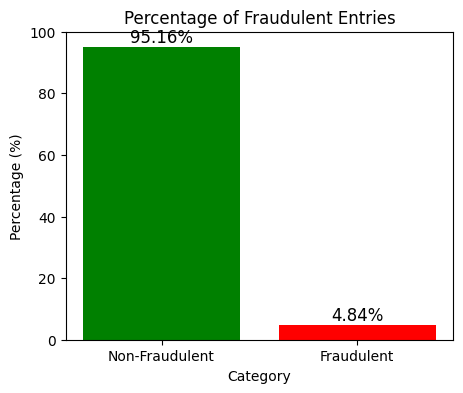

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of fraudulent entries
fraud_percentage = (processed_df['fraudulent'].sum() / len(processed_df)) * 100

# Create a bar chart
plt.figure(figsize=(5, 4))
plt.bar(['Non-Fraud', 'Fraud'], [100 - fraud_percentage, fraud_percentage], color=['green', 'red'])
plt.title('Percentage of Fraudulent Entries')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Display the percentage on top of each bar
for i, v in enumerate([100 - fraud_percentage, fraud_percentage]):
    plt.text(i, v , f'{v:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()


In [66]:
fraud_df = processed_df[processed_df["fraudulent"] == 1]
non_fraud_df = processed_df[processed_df["fraudulent"] == 0]

# Null Values

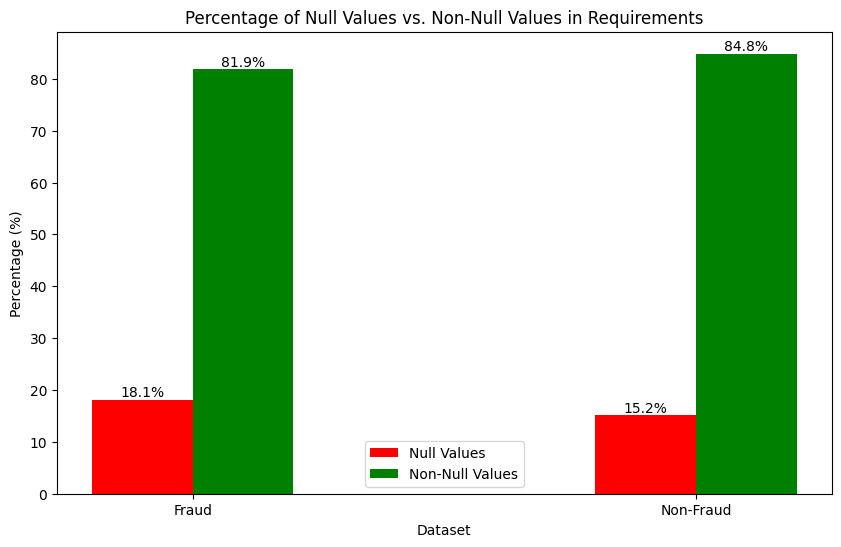

In [67]:
nan_count_fraud = (fraud_df['requirements'].isna()).sum()
non_nan_count_fraud = (fraud_df['requirements']).count()

nan_count_non_fraud = (non_fraud_df['requirements'].isna()).sum()
non_nan_count_non_fraud = (non_fraud_df['requirements']).count()

# Calculate percentages
total_count_fraud = len(fraud_df)
nan_percentage_fraud = (nan_count_fraud / total_count_fraud) * 100
non_nan_percentage_fraud = (non_nan_count_fraud / total_count_fraud) * 100

total_count_non_fraud = len(non_fraud_df)
nan_percentage_non_fraud = (nan_count_non_fraud / total_count_non_fraud) * 100
non_nan_percentage_non_fraud = (non_nan_count_non_fraud / total_count_non_fraud) * 100

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(2)

bars1 = plt.bar(index, [nan_percentage_fraud, nan_percentage_non_fraud], bar_width, color='red', label='Null Values')
bars2 = plt.bar([i + bar_width for i in index], [non_nan_percentage_fraud, non_nan_percentage_non_fraud], bar_width, color='green', label='Non-Null Values')

plt.xlabel('Dataset')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Null Values vs. Non-Null Values in Requirements')
plt.xticks([i + bar_width / 2 for i in index], ['Fraud', 'Non-Fraud'])
plt.legend()

# Add percentages on top of the bars
for bar, percentage in zip(bars1 + bars2, [nan_percentage_fraud, nan_percentage_non_fraud, non_nan_percentage_fraud, non_nan_percentage_non_fraud]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

# Word Cloud

In [68]:
def plot_wordcloud(tokenized_column):
    # Combine the tokenized words into a single string and remove single quotes
    text = ' '.join(tokenized_column).replace("'", "")

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


## Fraud

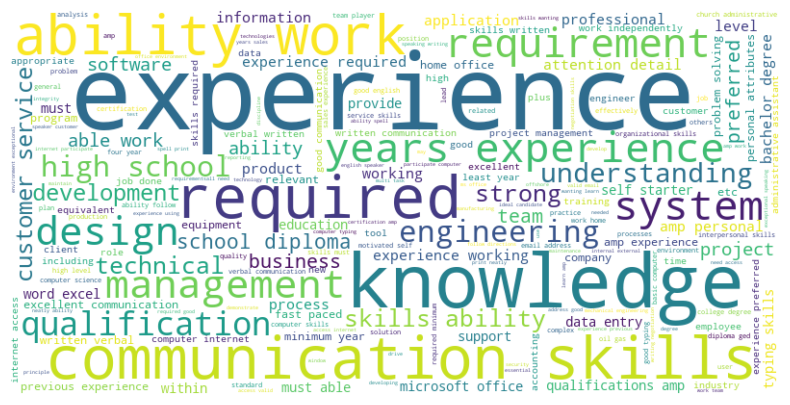

In [69]:
plot_wordcloud(fraud_df['tokenized_requirements'])

## Non-Fraud

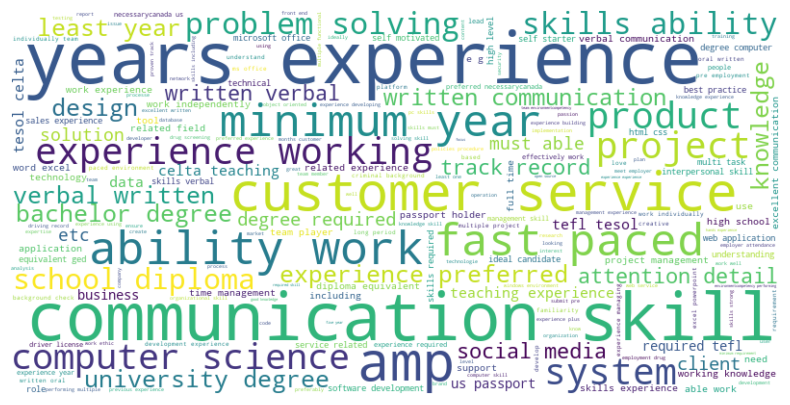

In [70]:
plot_wordcloud(non_fraud_df['tokenized_requirements'])

## Sentiment Analysis

## Fraud

In [71]:
# calculate VADER score
sentiments = SentimentIntensityAnalyzer()
sentiment_df = fraud_df[['job_id', 'requirements', 'fraudulent']].copy()
sentiment_df = sentiment_df[sentiment_df['requirements'].notna()]
sentiment_results = sentiment_df['requirements'].apply(sentiments.polarity_scores)

In [72]:
sentiment_df["Positive"] = list(map(lambda x: x['pos'], sentiment_results))
sentiment_df["Negative"] = list(map(lambda x: x['neg'], sentiment_results))
sentiment_df["Neutral"] = list(map(lambda x: x['neu'], sentiment_results))
sentiment_df["compound"] = list(map(lambda x: x['compound'], sentiment_results))
sentiment_df

,job_id,requirements,fraudulent,Positive,Negative,Neutral,compound
98,99,qualificationsknowledge skills amp abilities a...,1,0.132,0.000,0.868,0.9300
173,174,job qualifications ability to understand proce...,1,0.182,0.015,0.803,0.9774
180,181,sales executive,1,0.000,0.000,1.000,0.0000
215,216,qualificationsknowledge skills amp abilities a...,1,0.132,0.000,0.868,0.9300
357,358,prior car sales expprior car loan financing exp,1,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...
17826,17827,attention to detail confidentiality thoroughne...,1,0.139,0.000,0.861,0.2732
17828,17829,what you can do have the potential to earn an ...,1,0.276,0.000,0.724,0.9821
17829,17830,a proven track record in android java projects...,1,0.160,0.022,0.818,0.9657
17830,17831,job requirements high school diploma or equiva...,1,0.282,0.000,0.718,0.8481


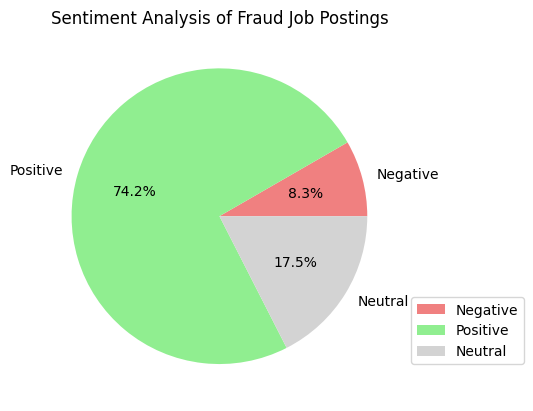

In [73]:
# visualize the distribution of sentiment category
senti_pie_count_list = []
senti_pie_count_list.append(len(sentiment_df[sentiment_df['compound'] < -0.05]))
senti_pie_count_list.append(len(sentiment_df[sentiment_df['compound'] > 0.05]))
senti_pie_count_list.append(len(sentiment_df[(sentiment_df['compound'] < 0.05) & (sentiment_df['compound'] > -0.05)]))

colors = ['lightcoral', 'lightgreen', 'lightgrey']
labels = ["Negative","Positive","Neutral"]

plt.pie(np.array(senti_pie_count_list),labels = labels, colors = colors,autopct='%1.1f%%')
plt.title("Sentiment Analysis of Fraud Job Postings")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

## Non-fraud

In [74]:
# calculate VADER score
sentiments = SentimentIntensityAnalyzer()
sentiment_df = non_fraud_df[['job_id', 'requirements', 'fraudulent']].copy()
sentiment_df = sentiment_df[sentiment_df['requirements'].notna()]
sentiment_results = sentiment_df['requirements'].apply(sentiments.polarity_scores)

In [75]:
sentiment_df["Positive"] = list(map(lambda x: x['pos'], sentiment_results))
sentiment_df["Negative"] = list(map(lambda x: x['neg'], sentiment_results))
sentiment_df["Neutral"] = list(map(lambda x: x['neu'], sentiment_results))
sentiment_df["compound"] = list(map(lambda x: x['compound'], sentiment_results))
sentiment_df

,job_id,requirements,fraudulent,Positive,Negative,Neutral,compound
0,1,experience with content management systems a m...,0,0.162,0.041,0.797,0.9294
1,2,what we expect from you your key responsibilit...,0,0.248,0.010,0.741,0.9944
2,3,implement pre commissioning and commissioning ...,0,0.126,0.000,0.874,0.9719
3,4,education bachelor s or master s in gis busine...,0,0.185,0.014,0.801,0.9819
4,5,qualifications right now license in the state ...,0,0.108,0.083,0.809,0.4019
...,...,...,...,...,...,...,...
17875,17876,to ace this role you will eat comprehensive st...,0,0.240,0.010,0.750,0.9931
17876,17877,b a or b s in accounting desire to have fun wh...,0,0.214,0.000,0.786,0.9756
17877,17878,at least 12 years professional experience abil...,0,0.032,0.000,0.968,0.6124
17878,17879,1 must be fluent in the latest versions of cor...,0,0.171,0.030,0.799,0.9136


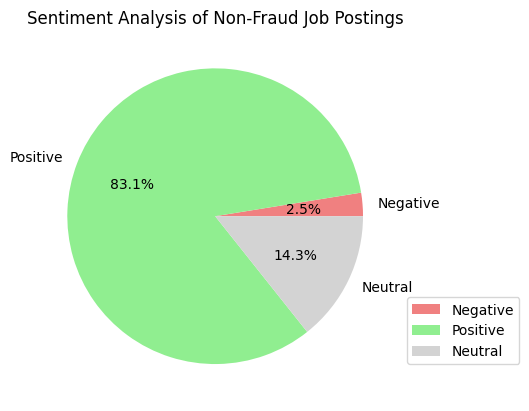

In [76]:
# visualize the distribution of sentiment category
senti_pie_count_list = []
senti_pie_count_list.append(len(sentiment_df[sentiment_df['compound'] < -0.05]))
senti_pie_count_list.append(len(sentiment_df[sentiment_df['compound'] > 0.05]))
senti_pie_count_list.append(len(sentiment_df[(sentiment_df['compound'] < 0.05) & (sentiment_df['compound'] > -0.05)]))

colors = ['lightcoral', 'lightgreen', 'lightgrey']
labels = ["Negative","Positive","Neutral"]

plt.pie(np.array(senti_pie_count_list),labels = labels, colors = colors,autopct='%1.1f%%')
plt.title("Sentiment Analysis of Non-Fraud Job Postings")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

# Text Length

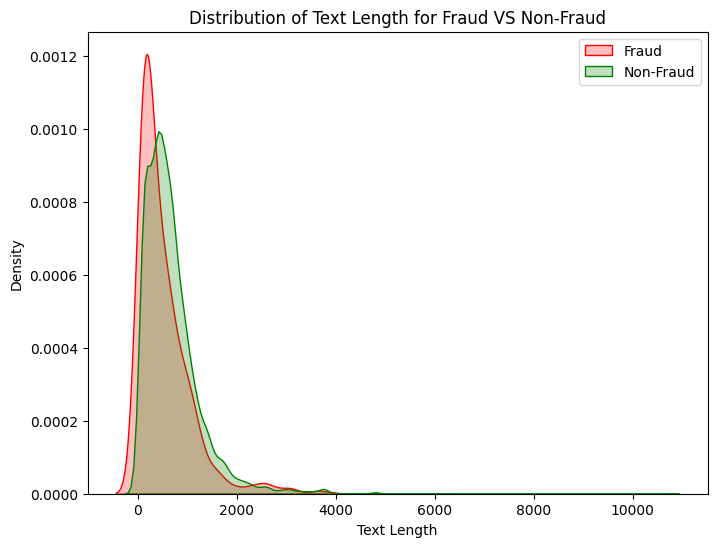

In [77]:
fraud_df = fraud_df[fraud_df['requirements'].notna()]
non_fraud_df = non_fraud_df[non_fraud_df['requirements'].notna()]

text_length_fraud = fraud_df['requirements'].apply(len)
text_lengths_non_fraud = non_fraud_df['requirements'].apply(len)

# Create density plots for text length distributions
plt.figure(figsize=(8, 6))
sns.kdeplot(data=text_length_fraud, label='Fraud', fill=True, color='red')
sns.kdeplot(data=text_lengths_non_fraud, label='Non-Fraud', fill=True, color='green')

# Add labels and a legend
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.title('Distribution of Text Length for Fraud VS Non-Fraud')
plt.legend()

# Show the plot
plt.show()

# N-Gram Analysis

In [78]:
stop_words = set(stopwords.words("english"))

def remove_stopwords_from_list(word_list):
    return [word for word in word_list if word.lower() not in stop_words]


## Fraud

In [79]:
fraud_df['lemmatized_requirements'] = fraud_df['lemmatized_requirements'].apply(remove_stopwords_from_list)

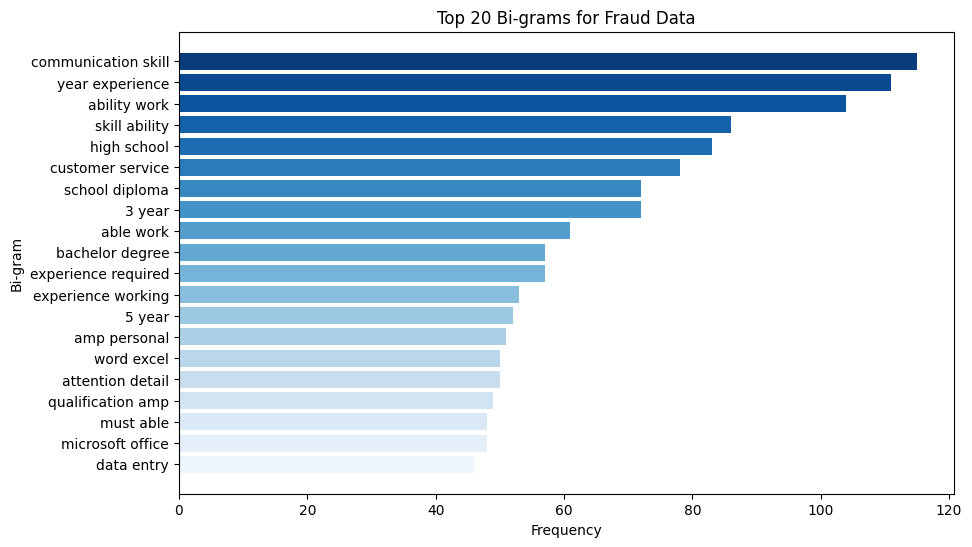

In [80]:
def generate_bigrams(tokens):
    return list(ngrams(tokens, 2))  # change 2 to n for n-grams of different lengths

fraud_df['bigrams'] = fraud_df['lemmatized_requirements'].apply(generate_bigrams)

all_bigrams = [bigram for sublist in fraud_df['bigrams'] for bigram in sublist]

from nltk.probability import FreqDist
bigram_freq = FreqDist(all_bigrams)

top_n = 20  # desired number of top bigrams
top_bigrams = bigram_freq.most_common(top_n)

bigrams = [' '.join(bigram[0]) for bigram in top_bigrams]
frequencies = [bigram[1] for bigram in top_bigrams]

colors = list(reversed(sns.color_palette("Blues", n_colors=len(bigrams))))

plt.figure(figsize=(10, 6))
plt.barh(bigrams, frequencies, color=colors)
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title(f'Top {top_n} Bi-grams for Fraud Data')
plt.gca().invert_yaxis()
plt.show()

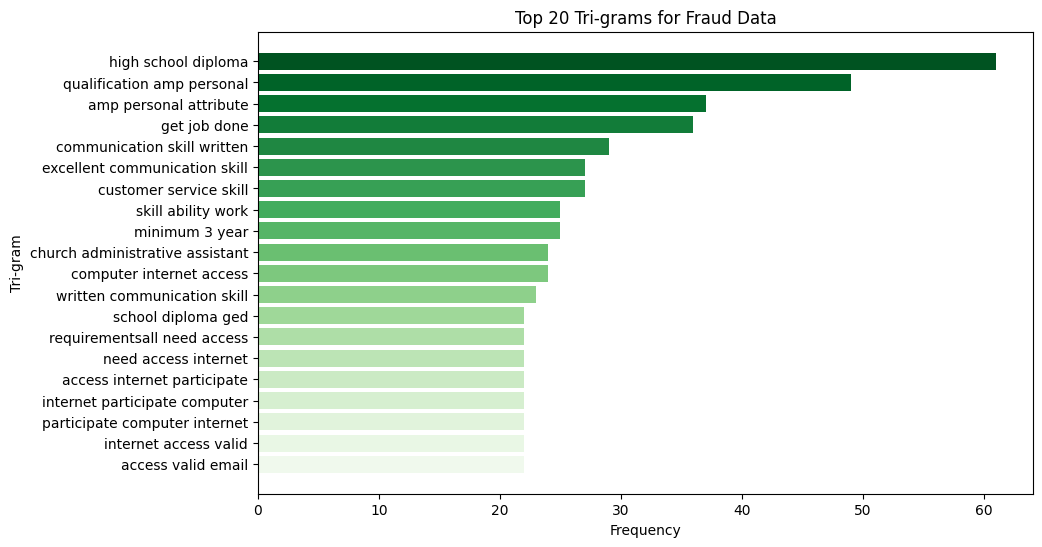

In [81]:
def generate_trigrams(tokens):
    return list(ngrams(tokens, 3))  # change 2 to n for n-grams of different lengths

fraud_df['trigrams'] = fraud_df['lemmatized_requirements'].apply(generate_trigrams)

all_trigrams = [trigram for sublist in fraud_df['trigrams'] for trigram in sublist]

from nltk.probability import FreqDist
trigram_freq = FreqDist(all_trigrams)

top_n = 20  # desired number of top trigrams
top_trigrams = trigram_freq.most_common(top_n)

trigrams = [' '.join(trigram[0]) for trigram in top_trigrams]
frequencies = [trigram[1] for trigram in top_trigrams]

colors = list(reversed(sns.color_palette("Greens", n_colors=len(trigrams))))

plt.figure(figsize=(10, 6))
plt.barh(trigrams, frequencies, color=colors)
plt.xlabel('Frequency')
plt.ylabel('Tri-gram')
plt.title(f'Top {top_n} Tri-grams for Fraud Data')
plt.gca().invert_yaxis()
plt.show()

## Non-Fraud

In [82]:
non_fraud_df['lemmatized_requirements'] = non_fraud_df['lemmatized_requirements'].apply(remove_stopwords_from_list)

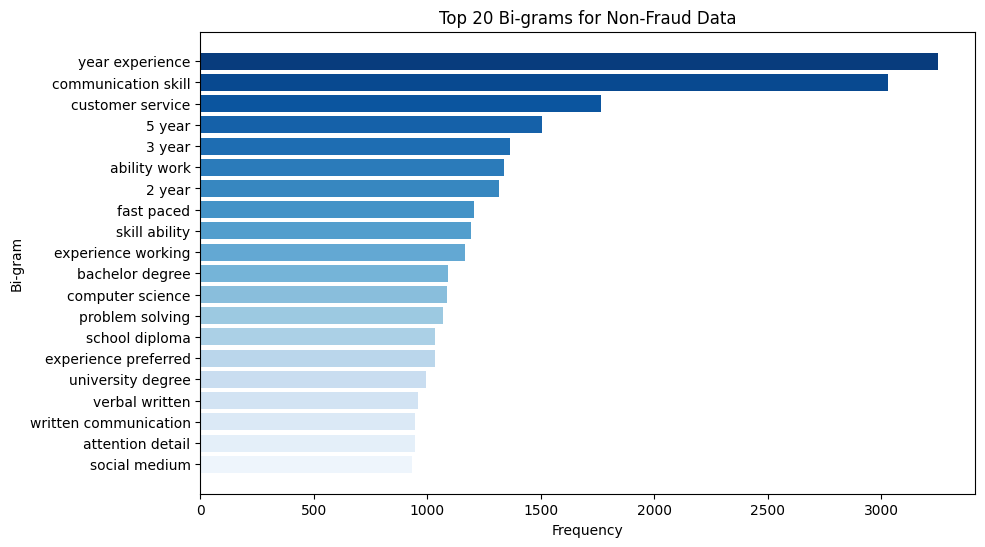

In [83]:
def generate_bigrams(tokens):
    return list(ngrams(tokens, 2))  # change 2 to n for n-grams of different lengths

non_fraud_df['bigrams'] = non_fraud_df['lemmatized_requirements'].apply(generate_bigrams)

all_bigrams = [bigram for sublist in non_fraud_df['bigrams'] for bigram in sublist]

from nltk.probability import FreqDist
bigram_freq = FreqDist(all_bigrams)

top_n = 20  # desired number of top bigrams
top_bigrams = bigram_freq.most_common(top_n)

bigrams = [' '.join(bigram[0]) for bigram in top_bigrams]
frequencies = [bigram[1] for bigram in top_bigrams]

colors = list(reversed(sns.color_palette("Blues", n_colors=len(bigrams))))

plt.figure(figsize=(10, 6))
plt.barh(bigrams, frequencies, color=colors)
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.title(f'Top {top_n} Bi-grams for Non-Fraud Data')
plt.gca().invert_yaxis()
plt.show()

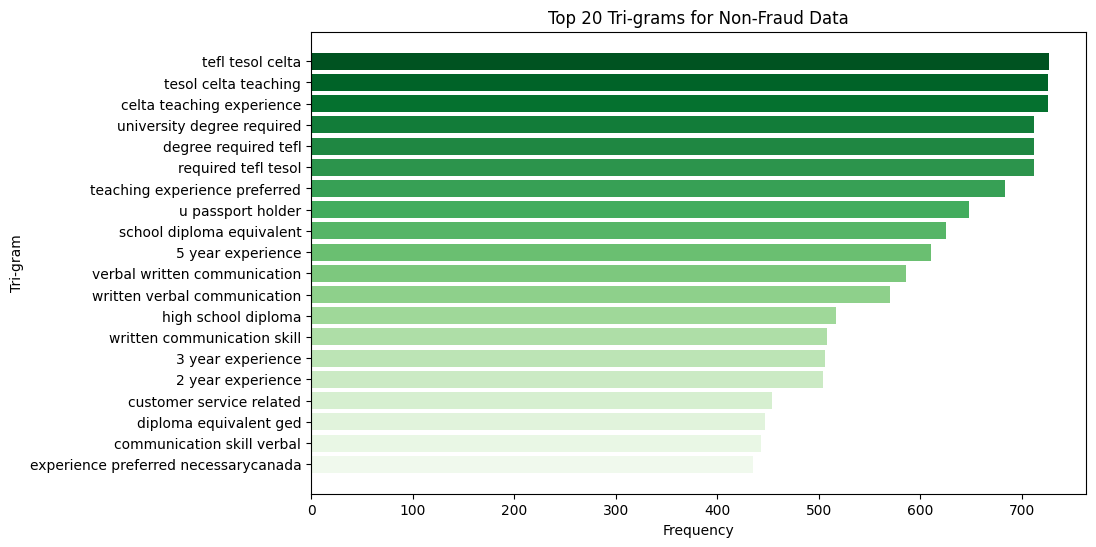

In [84]:
def generate_trigrams(tokens):
    return list(ngrams(tokens, 3))  # change 2 to n for n-grams of different lengths

non_fraud_df['trigrams'] = non_fraud_df['lemmatized_requirements'].apply(generate_trigrams)

all_trigrams = [trigram for sublist in non_fraud_df['trigrams'] for trigram in sublist]

from nltk.probability import FreqDist
trigram_freq = FreqDist(all_trigrams)

top_n = 20  # desired number of top trigrams
top_trigrams = trigram_freq.most_common(top_n)

trigrams = [' '.join(trigram[0]) for trigram in top_trigrams]
frequencies = [trigram[1] for trigram in top_trigrams]

colors = list(reversed(sns.color_palette("Greens", n_colors=len(trigrams))))

plt.figure(figsize=(10, 6))
plt.barh(trigrams, frequencies, color=colors)
plt.xlabel('Frequency')
plt.ylabel('Tri-gram')
plt.title(f'Top {top_n} Tri-grams for Non-Fraud Data')
plt.gca().invert_yaxis()
plt.show()